In [1]:
import math
from scipy.integrate import quad, romberg

#zad1

f = lambda x : math.exp(-2*x)
analitycznie = 1/2 - (1/2)*math.exp(-2)
 
def prostokaty(f, a, b):
    return abs(b-a) * f((a+b)/2)
 

def trapezy_prosty(f, a, b):
    return (abs(b-a) * (f(a) + f(b)))/2
 

def simpson_prosty(f, a, b):
    h = (b-a)/2
    return h/3 * (f(a) + 4*f((a+b)/2) + f(b))
 

def trapezy_zlozony(f, a, b, n):
    h = abs(b-a) / n
    result = 0
    for i in range(1, n+1):
        result += h/2 * (f(a+(i-1)*h) + f(a+i*h))
    return result
 

def simpson_zlozony(f, a, b, n):
    h = abs(b-a) / n
    result = 0
    for i in range(1, n+1):
        result += simpson_prosty(f, a+(i-1)*h, a+i*h)
    return result

print("1. metoda analityczna: ", analitycznie)
print("2. metoda prostokatow: ", prostokaty(f, 0, 1))
print("3. prosty wzor trapezow: ", trapezy_prosty(f, 0, 1))
print("4. prosty wzor Simpsona: ", simpson_prosty(f, 0, 1))
print("5. zlozony wzor trapezow: ", trapezy_zlozony(f, 0, 1, 10))
print("6. zlozony wzor Simpsona: ", simpson_zlozony(f, 0, 1, 10)) 
print("7. metoda Romberga: ", romberg(f,0,1,tol=10**(-6))) 
print("8. metoda scipy.integrate.quad: ", quad(f, 0, 1)[0])
print("Wyniki otrzymane przy użyciu zlożonego wzoru Simpsona, metody Romberga oraz scipy.integrate.quad są najbardziej zbliżone do wyniku analitycznego")

1. metoda analityczna:  0.43233235838169365
2. metoda prostokatow:  0.36787944117144233
3. prosty wzor trapezow:  0.5676676416183064
4. prosty wzor Simpsona:  0.4344755079870637
5. zlozony wzor trapezow:  0.4337725064184668
6. zlozony wzor Simpsona:  0.43233259828070303
7. metoda Romberga:  0.432332358389
8. metoda scipy.integrate.quad:  0.4323323583816936
Wyniki otrzymane przy użyciu zlożonego wzoru Simpsona, metody Romberga oraz scipy.integrate.quad są najbardziej zbliżone do wyniku analitycznego


In [2]:
#zad 2
from scipy.optimize import newton
from scipy.stats import norm

f2 = lambda t: (1/math.sqrt(2*math.pi))*math.exp(-t**2/2)

trapezy = lambda x: trapezy_zlozony(f2, 0, x, 10) - 0.45
simpson = lambda x: simpson_zlozony(f2, 0, x, 10) - 0.45
p0 = 0.5

wynik_trapezy=newton(trapezy, p0,fprime=f2)
wynik_simpson=newton(simpson, p0,fprime=f2)

print("sprawdzenie dla metody trapezow: ",norm(0, 1).cdf(wynik_trapezy)-norm(0,1).cdf(0))
print("sprawdzenie dla metody simpsona: ",norm(0, 1).cdf(wynik_simpson)-norm(0,1).cdf(0))
print("wynik dla metody trapezow: ",wynik_trapezy)
print("wynik dla metody Simpsona: ",wynik_simpson)
print("wartosc referencyjna",norm(0,1).ppf(0.95))
print("rozwiazanie rownania jest dokladniejsze dla metody Simpsona")


sprawdzenie dla metody trapezow:  0.450382778275
sprawdzenie dla metody simpsona:  0.449999987469
wynik dla metody trapezow:  1.648576416823456
wynik dla metody Simpsona:  1.644853505454345
wartosc referencyjna 1.64485362695
rozwiazanie rownania jest dokladniejsze dla metody Simpsona


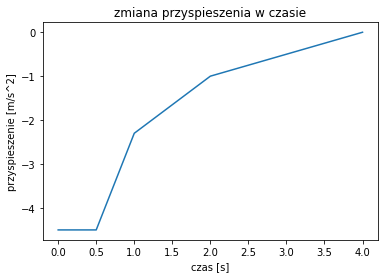

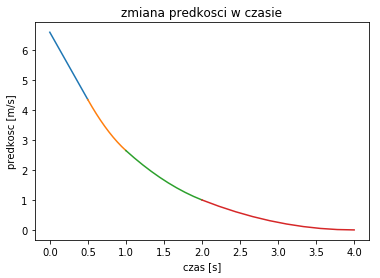

droga hamowania:  6.824999999999999  [m]
srednia predkosc w czasie [0,0.5]s:  5.475  [m/s]


In [5]:
#zad3
import matplotlib.pyplot as plt
import numpy as np

czas = [0.0,0.5,1.0,2.0,3.0,4.0]
przyspieszenie = [-4.5,-4.5,-2.3,-1.0,-0.5,0.0]
plt.plot(czas,przyspieszenie)
plt.title("zmiana przyspieszenia w czasie")
plt.xlabel("czas [s]")
plt.ylabel("przyspieszenie [m/s^2]")
plt.show()
#obliczam funkcje pierwotne dla przyblizonych funkcji z kazdego przedzialu
#[0,0.5] f(x) = -4.5, funkcja pierwotna F(x) = -4.5x + C 
#[0.5,1.0] f(x) = 4.4x - 6.7, funkcja pierwotna F(x) = 2.2x^2 - 6.7x + C
#[1.0,2.0] f(x) = 1.3x - 3.6, funkcja pierwotna F(x) = 0.65x^2 - 3.6x + C
#[2.0,4.0] f(x) = 0.5x - 2, funkcja pierwotna F(x) = 0.25x^2 - 2x + C
#dobieram stale tak aby funkcja sklejona z powyzszych byla ciagla i spelniala warunek Vkoncowe=0
f1 = lambda x: -4.5*x + 6.6
f2 = lambda x: 2.2*x**2 - 6.7*x + 7.15
f3 = lambda x: 0.65*x**2 - 3.6*x + 5.6
f4 = lambda x: 0.25*x**2 - 2*x + 4

plt.plot(np.linspace(0,0.5,10),f1(np.linspace(0,0.5,10)))
plt.plot(np.linspace(0.5,1.0,10),f2(np.linspace(0.5,1.0,10)))
plt.plot(np.linspace(1.0,2.0,10),f3(np.linspace(1.0,2.0,10)))
plt.plot(np.linspace(2.0,4.0,10),f4(np.linspace(2.0,4.0,10)))
plt.title("zmiana predkosci w czasie")
plt.xlabel("czas [s]")
plt.ylabel("predkosc [m/s]")
plt.show()

droga = quad(f1, 0, 0.5)[0] + quad(f2, 0.5, 1.0)[0] + quad(f3, 1.0, 2.0)[0] + quad(f4,2.0, 4.0)[0]
print("droga hamowania: ",droga," [m]")

vsrednia = quad(f1, 0, 0.5)[0] / 0.5
print("srednia predkosc w czasie [0,0.5]s: ",vsrednia," [m/s]")


dla metody trapezow (100 przedziałów):  11.063484780895658  metrow
dla metody Simpsona (100 przedziałów):  11.06348478089566  metrow
dla metody trapezow (jeden przedział):  15.825159885482952  metrow
dla metody Simpsona (jeden przedział):  15.82515988548295  metrow
dla metody Romberga:  15.8251598855  metrow


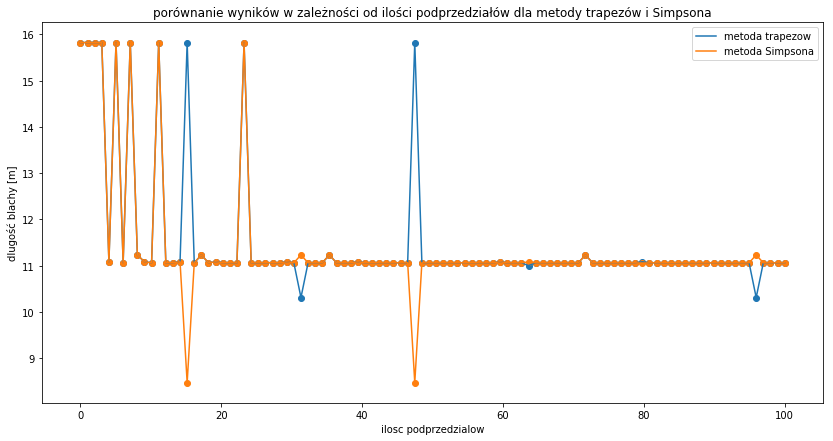

dla więszkej ilości podprzedziałów przy użyciu metod Simpsona i trapezów wynik odbiega od wyniku dla metody Romberga


In [15]:
#zad 4

fala = lambda x: 0.1*math.sin(2*math.pi*x/0.2) # funkcja fali
fala_pochodna = lambda x: math.pi*math.cos(10*math.pi*x) # pochodna funkcji fali
wzor = lambda x: math.sqrt(1+(fala_pochodna(x))**2) # wzor na dlugosc luku
trapezy = trapezy_zlozony(wzor,0,4.8,1)
simpson = simpson_zlozony(wzor,0,4.8,1)
metoda_romberga = romberg(wzor,0,4.8)
print("dla metody trapezow (100 przedziałów): ",trapezy_zlozony(wzor,0,4.8,100)," metrow")
print("dla metody Simpsona (100 przedziałów): ",simpson_zlozony(wzor,0,4.8,100)," metrow")
print("dla metody trapezow (jeden przedział): ",trapezy_zlozony(wzor,0,4.8,1)," metrow")
print("dla metody Simpsona (jeden przedział): ",simpson_zlozony(wzor,0,4.8,1)," metrow")
print("dla metody Romberga: ",metoda_romberga," metrow")

trapezy_y = []
simpson_y = []
for i in range(1,101):
    trapezy_y.append(trapezy_zlozony(wzor,0,4.8,i))
    simpson_y.append(simpson_zlozony(wzor,0,4.8,i))

plt.figure(figsize=(14,7))
plt.plot(np.linspace(0,100,100),trapezy_y,label="metoda trapezow")
plt.legend()
plt.plot(np.linspace(0,100,100),simpson_y,label="metoda Simpsona")
plt.legend()
plt.scatter(np.linspace(0,100,100),trapezy_y)
plt.scatter(np.linspace(0,100,100),simpson_y)
plt.title("porównanie wyników w zależności od ilości podprzedziałów dla metody trapezów i Simpsona")
plt.xlabel("ilosc podprzedzialow")
plt.ylabel("dlugość blachy [m]")
plt.show()

print("wynik dla metod Simpsona i trapezów jest zbliżony do wyniku dla metody Romberga, jeśli użyjemy tych metod dla 24,12,6,3,2,1 przedziałów, czyli przedziały te będą zamykać się po wielokrotnościach okresu funkcji. 4.8/0.2=24, 24 jest maksymalna liczbą przedziałów aby było to spełnione. ")